# EJERCICIOS

In [280]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
import seaborn as sns
from scipy.stats import reciprocal
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, cross_validate, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MultiLabelBinarizer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer

## EJERCICIO 1

Vamos a trabajar con el siguiente conjunto de datos: https://www.datacamp.com/es/datalab/datasets/dataset-python-loans

| Variable      	| Explicación                                                                                                             |
|-------------------|-------------------------------------------------------------------------------------------------------------------------|
| credit_policy	    | 1 si el cliente cumple con los criterios de suscripción de crédito; 0 en caso contrario.                                |
| purpose	        | El propósito del préstamo.                                                                                              |
| int_rate	        | La tasa de interés del préstamo (a los prestatarios más riesgosos se les asignan tasas más altas).                      |
| installment	    | Las cuotas mensuales del prestamo                                                                                       |
| log_annual_inc    | El logaritmo natural del ingreso anual declarado por el prestatario.                                                    |
| dti	            | La relación deuda-ingreso del prestatario (monto de deuda dividido por ingresos anuales).                               |
| fico	            | El puntaje de crédito FICO del prestatario.                                                                             |
| days_with_cr_line	| El número de días que el prestatario ha tenido una línea de crédito.                                                    |
| revol_bal	        | El saldo rotativo del prestatario (monto no pagado al final del ciclo de facturación de la tarjeta).                    |
| revol_util        | La tasa de utilización de la línea de crédito del prestatario (monto de crédito utilizado respecto al total disponible).|
| inq_last_6mths	| El número de consultas de los acreedores al prestatario en los últimos 6 meses.                                         |
| delinq_2yrs	    | El número de veces que el prestatario ha estado más de 30 días en mora en un pago en los últimos 2 años.                |
| pub_rec	        | El número de registros públicos despectivos del prestatario.                                                            |
| not_fully_paid    | 1 si el préstamo se pagó totalmente; 0 en caso contrario.                                                        |

El csv lo tienes disponible en Moodle

Este conjunto de datos consta de más de 9500 préstamos con información sobre los datos del préstamo y si el préstamo fue pagado en su totalidad o no. Estos datos fueron extraídos de LendingClub.com
Crea un clasificador para predecir si un prestamo va a ser pagado o no.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [281]:
loan_data = pd.read_csv("Datos/loan_data.csv")

#### EXPLORAR LOS DATOS

Entre otras cosas: estadísticas, matriz de correlaciones y borrar columnas innecesarias.

In [282]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [283]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [284]:
loan_data.head(8)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1


In [285]:
loan_data.describe(include='object')

,purpose
count,9578
unique,7
top,debt_consolidation
freq,3957


In [286]:
loan_data["purpose"].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [287]:
corr_matrix = loan_data.corr(numeric_only=True).abs()
target_corr=corr_matrix['not.fully.paid'].sort_values(ascending=False)
target_corr

not.fully.paid       1.000000
int.rate             0.159552
credit.policy        0.158119
fico                 0.149666
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
log.annual.inc       0.033439
days.with.cr.line    0.029237
delinq.2yrs          0.008881
Name: not.fully.paid, dtype: float64

In [288]:
corr_matrix.style.background_gradient()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,0.294089,0.058770,0.034906,0.090901,0.348319,0.099026,0.187518,0.104095,0.535511,0.076318,0.054243,0.158119
int.rate,0.294089,1.000000,0.276140,0.056383,0.220006,0.714821,0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,0.010419,0.004368,0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,0.033439
dti,0.090901,0.220006,0.050202,0.054065,1.000000,0.241191,0.060101,0.188748,0.337109,0.029189,0.021792,0.006209,0.037362
fico,0.348319,0.714821,0.086039,0.114576,0.241191,1.000000,0.263880,0.015553,0.541289,0.185293,0.216340,0.147592,0.149666
days.with.cr.line,0.099026,0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,0.024239,0.041736,0.081374,0.071826,0.029237
revol.bal,0.187518,0.092527,0.233625,0.372140,0.188748,0.015553,0.229344,1.000000,0.203779,0.022394,0.033243,0.031010,0.053699
revol.util,0.104095,0.464837,0.081356,0.054881,0.337109,0.541289,0.024239,0.203779,1.000000,0.013880,0.042740,0.066717,0.082088
inq.last.6mths,0.535511,0.202780,0.010419,0.029171,0.029189,0.185293,0.041736,0.022394,0.013880,1.000000,0.021245,0.072673,0.149452


In [289]:
# Borramos los datos con una correlación muy baja
loan_data_copy=loan_data.copy()
a_borrar=target_corr[target_corr < 0.04].index.to_list()
loan_data_copy=loan_data_copy.drop(columns=a_borrar)
corr_matrix = loan_data_copy.corr(numeric_only=True).abs()
corr_matrix.style.background_gradient()

,credit.policy,int.rate,installment,fico,revol.bal,revol.util,inq.last.6mths,pub.rec,not.fully.paid
credit.policy,1.000000,0.294089,0.058770,0.348319,0.187518,0.104095,0.535511,0.054243,0.158119
int.rate,0.294089,1.000000,0.276140,0.714821,0.092527,0.464837,0.202780,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.086039,0.233625,0.081356,0.010419,0.032760,0.049955
fico,0.348319,0.714821,0.086039,1.000000,0.015553,0.541289,0.185293,0.147592,0.149666
revol.bal,0.187518,0.092527,0.233625,0.015553,1.000000,0.203779,0.022394,0.031010,0.053699
revol.util,0.104095,0.464837,0.081356,0.541289,0.203779,1.000000,0.013880,0.066717,0.082088
inq.last.6mths,0.535511,0.202780,0.010419,0.185293,0.022394,0.013880,1.000000,0.072673,0.149452
pub.rec,0.054243,0.098162,0.032760,0.147592,0.031010,0.066717,0.072673,1.000000,0.048634
not.fully.paid,0.158119,0.159552,0.049955,0.149666,0.053699,0.082088,0.149452,0.048634,1.000000


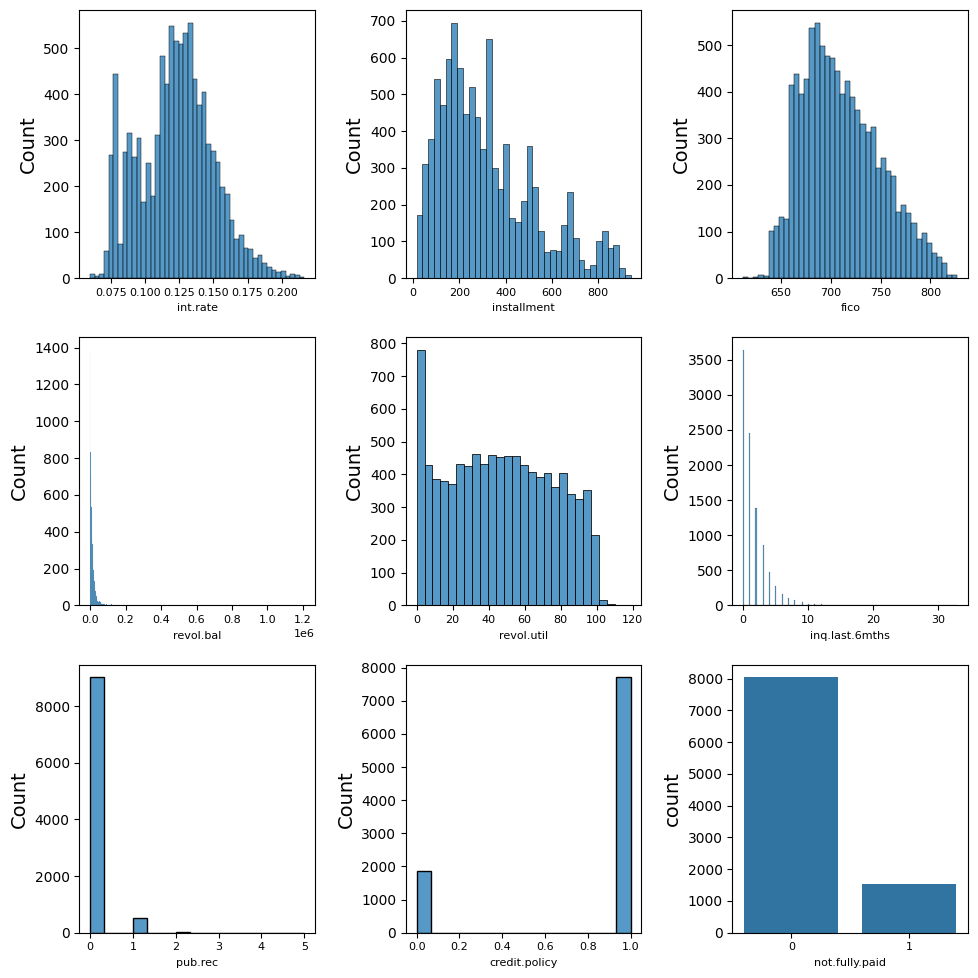

In [290]:
columnas=['int.rate','installment','fico','revol.bal','revol.util','inq.last.6mths','pub.rec','credit.policy','not.fully.paid']
columnas_dicretas=['credit.policy','not.fully.paid']


Xs=['int.rate','installment','fico','revol.bal','revol.util','inq.last.6mths','pub.rec','credit.policy','not.fully.paid']
plt.figure(figsize=(10,10))
for contador in range(9):
    plt.subplot(3,3,contador+1)
    plt.xlabel(Xs[contador],fontsize=8)
    if contador<8:
        sns.histplot(loan_data,x=Xs[contador],legend=None)
    else:
        sns.countplot(loan_data,x=Xs[contador],legend=None)


plt.tight_layout()
plt.show()


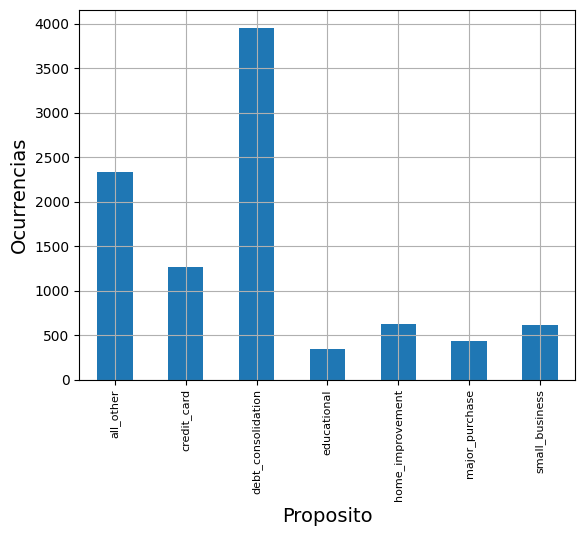

In [291]:
loan_data_copy["purpose"].value_counts().sort_index().plot.bar(rot=90, grid=True)
plt.xlabel("Proposito")
plt.ylabel("Ocurrencias")
plt.show()

<Axes: xlabel='purpose', ylabel='count'>

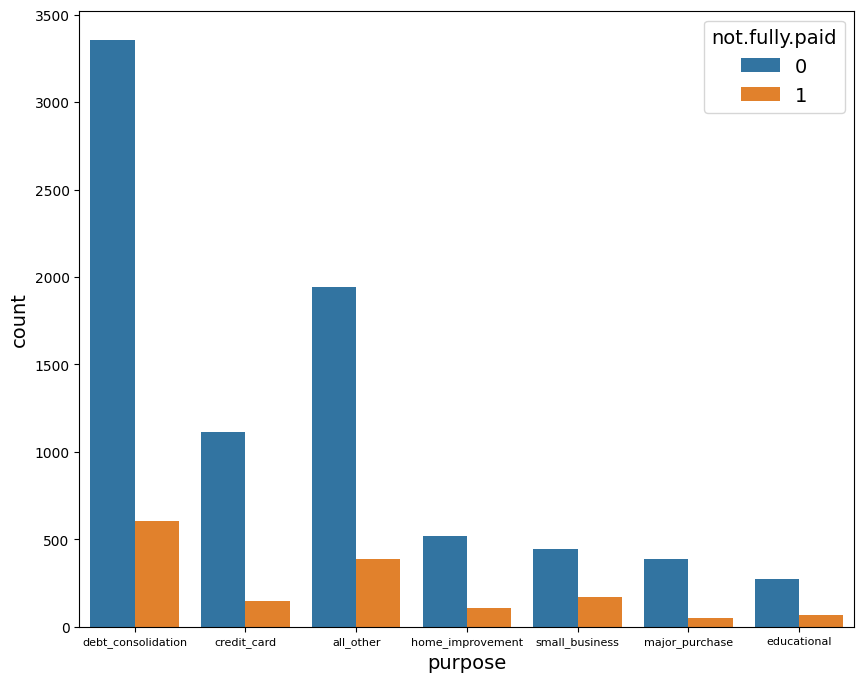

In [292]:
plt.figure(figsize=(10,8))
plt.tight_layout()
sns.countplot(loan_data_copy,x='purpose',legend=True,hue='not.fully.paid')

In [293]:
"""
Parece ser que la variable de proposito no afecta demasiado 
"""
print(loan_data_copy[['purpose', 'not.fully.paid']].groupby('purpose', as_index=False).mean())
print(loan_data_copy[['not.fully.paid']].mean())

              purpose  not.fully.paid
0           all_other        0.166023
1         credit_card        0.115689
2  debt_consolidation        0.152388
3         educational        0.201166
4    home_improvement        0.170111
5      major_purchase        0.112128
6      small_business        0.277868
not.fully.paid    0.160054
dtype: float64


#### DIVIDIR LOS DATOS

In [294]:
df_loan_train, df_loan_test = train_test_split(loan_data, test_size=0.15, random_state=17)
df_loan_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8141 entries, 843 to 2191
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      8141 non-null   int64  
 1   purpose            8141 non-null   object 
 2   int.rate           8141 non-null   float64
 3   installment        8141 non-null   float64
 4   log.annual.inc     8141 non-null   float64
 5   dti                8141 non-null   float64
 6   fico               8141 non-null   int64  
 7   days.with.cr.line  8141 non-null   float64
 8   revol.bal          8141 non-null   int64  
 9   revol.util         8141 non-null   float64
 10  inq.last.6mths     8141 non-null   int64  
 11  delinq.2yrs        8141 non-null   int64  
 12  pub.rec            8141 non-null   int64  
 13  not.fully.paid     8141 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 954.0+ KB


#### PREPARAR LOS DATOS

In [295]:

imputer_moda=SimpleImputer(strategy='most_frequent')
imputer_media=SimpleImputer(strategy='mean')

pipeline_media = make_pipeline(
    imputer_media,
    FunctionTransformer(np.sqrt, feature_names_out="one-to-one"),
    StandardScaler()
)
pipeline_moda = make_pipeline(
    imputer_moda,
    FunctionTransformer(np.sqrt, feature_names_out="one-to-one"),
    StandardScaler()
)

purpose_pipeline = make_pipeline(
    imputer_moda,
    OneHotEncoder(sparse_output=False, handle_unknown='ignore')
)


#'dti', 'log.annual.inc', 'days.with.cr.line', 'delinq.2yrs'
transformar = ColumnTransformer([
        ("pipeline_media", pipeline_media, ["revol.util", "revol.bal", "installment", "int.rate"]),
        ("pipeline_moda", pipeline_moda, ["pub.rec", "inq.last.6mths", "fico", "credit.policy"]),
        ("purpose", purpose_pipeline, ["purpose"]),
        ("drop_columns", 'drop', ["dti", "log.annual.inc", "delinq.2yrs", "days.with.cr.line"])
    ], 
    remainder='passthrough',
    verbose_feature_names_out=False
)

pipeline=make_pipeline(transformar)

prep_array = pipeline.fit_transform(loan_data)

feature_names = pipeline.get_feature_names_out()

df_loan_adapt = pd.DataFrame(prep_array, columns=feature_names)

df_loan_adapt.head()

,revol.util,revol.bal,installment,int.rate,pub.rec,inq.last.6mths,fico,credit.policy,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,not.fully.paid
0,0.341989,0.845291,2.068832,-0.083624,-0.247147,-1.085294,0.699516,0.492222,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.938342,1.021277,-0.314902,-0.537299,-0.247147,-1.085294,-0.088694,0.492222,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.493928,-0.596517,0.389855,0.525051,-0.247147,0.089698,-0.758405,0.492222,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.860050,1.022840,-0.726905,-0.789782,-0.247147,0.089698,0.043819,0.492222,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.019401,-0.471460,-1.179077,0.764050,-0.247147,-1.085294,-1.166135,0.492222,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Usa evaluación cruzada con los siguientes algoritmos:
- Regresión logisitca
- SGDClassifier
- K vecinos mas cercanos
- Random Forest

 y evalua los resultados en el conjunto de entrenamiento con las siguientes métricas: exactitud, prescisión, sensibilidad, f1, curva de roc y área bajo la curva de roc

LogisticRegression
exactitud: 0.8404372927158825
precision: 0.6470588235294118
sensibilidad: 0.02511415525114155
f1: 0.04835164835164835
El modelo soporta evaluación cruzada


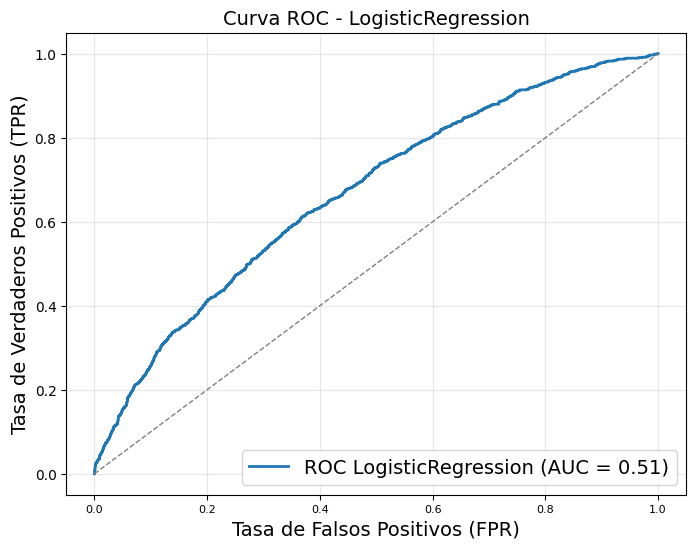

Área bajo la curva ROC: 0.51

------------------
SGDClassifier
exactitud: 0.8385947672276133
precision: 0.5
sensibilidad: 0.0015220700152207
f1: 0.0030349013657056147
El modelo soporta evaluación cruzada


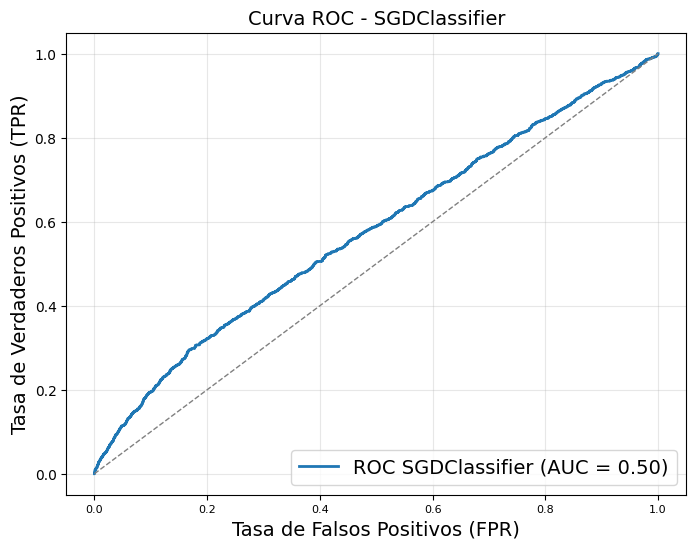

Área bajo la curva ROC: 0.50

------------------
KNeighborsClassifier
exactitud: 0.8153789460754207
precision: 0.25326370757180156
sensibilidad: 0.07382039573820395
f1: 0.11431938715380083
El modelo no soporta decision_function. Omitimos calculo roc.
------------------
RandomForestClassifier
exactitud: 0.8346640461859722
precision: 0.3431372549019608
sensibilidad: 0.02663622526636225
f1: 0.04943502824858757
El modelo no soporta decision_function. Omitimos calculo roc.
------------------


In [296]:

df_loan_train_y=df_loan_train['not.fully.paid'].copy()
df_loan_train_x=df_loan_train.drop('not.fully.paid',axis=1)

modelo_LR=make_pipeline(transformar,LogisticRegression(random_state=17,max_iter=1000))
modelo_SDG=make_pipeline(transformar,SGDClassifier(random_state=17))
modelo_KNN=make_pipeline(transformar,KNeighborsClassifier())
modelo_RF=make_pipeline(transformar,RandomForestClassifier(random_state=17))

modelos=[modelo_LR,modelo_SDG,modelo_KNN,modelo_RF]

for modelo in modelos:
    modelo.fit(df_loan_train_x,df_loan_train_y)
    predicciones = cross_val_predict(modelo, df_loan_train_x, df_loan_train_y, cv=3)
    exactitud=accuracy_score(df_loan_train_y,predicciones)
    precision=precision_score(df_loan_train_y,predicciones,zero_division=1)
    sensibilidad=recall_score(df_loan_train_y,predicciones,zero_division=1)
    f1=f1_score(df_loan_train_y,predicciones,zero_division=1)
    roc_auc=roc_auc_score(df_loan_train_y,predicciones)

    

    print(modelo.steps[-1][1].__class__.__name__)
    print("exactitud:",exactitud)
    print("precision:",precision)
        
    print("f1:",f1)
    
    try:
        modelo_crossval = cross_val_predict(modelo, df_loan_train_x, df_loan_train_y, cv=3, method='decision_function')
        print("El modelo soporta evaluación cruzada")
        fpr, tpr, thresholds = roc_curve(df_loan_train_y, modelo_crossval)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC {modelo.steps[-1][1].__class__.__name__} (AUC = {roc_auc:.2f})', lw=2)
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Línea de referencia
        plt.xlabel('Tasa de Falsos Positivos (FPR)')
        plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
        plt.title(f'Curva ROC - {modelo.steps[-1][1].__class__.__name__}')
        plt.legend(loc='lower right')
        plt.grid(alpha=0.3)
        plt.show()

        print(f'Área bajo la curva ROC: {roc_auc:.2f}')
        print("")

    except:
        print("El modelo no soporta decision_function. Omitimos calculo roc.")
    print("------------------")



In [297]:
"""
A vista de estos resultados el modelo RandomForest parece ser el mejor (Perfecto aparentemente),
nos vamos con el LogisticRegresion que este si es posible optimizarlo
"""

'\nA vista de estos resultados el modelo RandomForest parece ser el mejor (Perfecto aparentemente),\nnos vamos con el LogisticRegresion que este si es posible optimizarlo\n'

### OPMITZACIÓN DEL MODELO

#### OPTIMIZACIÓN

Usa búsqueda exhaustiva o búsqueda aleatoria para optimizar el mejor modelo del apartado anterior

In [298]:
full_pieline=Pipeline([
    ('preprocessing',transformar),
    ('classifier',LogisticRegression())
])
param_dist = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],            # Inverso de la fuerza de regularización
    'classifier__solver': ['lbfgs', 'saga', 'liblinear'],       # Algoritmos de optimización
    'classifier__max_iter': [5000],                             # Número máximo de iteraciones
    'classifier__random_state': [17]                            # Fijar la semilla para reproducibilidad
}

# Configurar la búsqueda aleatoria
grid_search = GridSearchCV(
    estimator=full_pieline,
    param_grid=param_dist,
    scoring="recall",  # Métrica de evaluación
    cv=5,  # Validación cruzada con 5 folds
    verbose=1,  # Mostrar progreso
    n_jobs=-1  # Usar todos los núcleos disponibles 
)

# Realizar la búsqueda en el conjunto de entrenamiento
grid_search.fit(df_loan_train_x, df_loan_train_y)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros GridSearch:", grid_search.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores hiperparámetros GridSearch: {'classifier__C': 10, 'classifier__max_iter': 5000, 'classifier__random_state': 17, 'classifier__solver': 'lbfgs'}


#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

Evalúa el conjunto de pruebas con diferentes métricas

Evaluación en el conjunto de pruebas:
Exactitud: 0.8455114822546973
Precisión: 0.3333333333333333
Sensibilidad: 0.0136986301369863
F1-Score: 0.02631578947368421
Área bajo la curva ROC (AUC): 0.5043862608813011


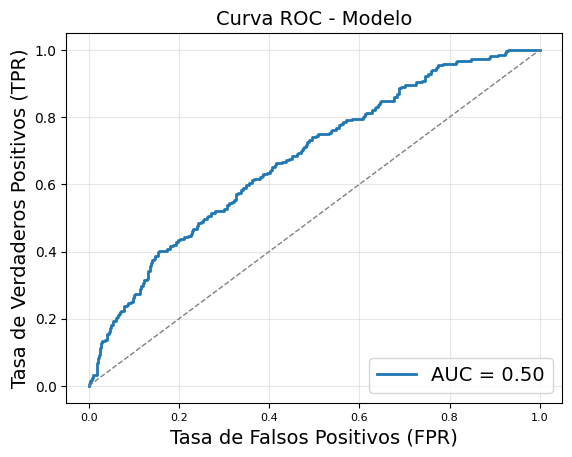

In [299]:
df_loan_test_y=df_loan_test['not.fully.paid'].copy()
df_loan_test_x=df_loan_test.drop('not.fully.paid',axis=1)

best_model = grid_search.best_estimator_
y_predicciones_test=best_model.predict(df_loan_test_x)

# Calcular métricas
test_accuracy = accuracy_score(df_loan_test_y, y_predicciones_test)
test_precision = precision_score(df_loan_test_y, y_predicciones_test)
test_recall = recall_score(df_loan_test_y, y_predicciones_test)
test_f1 = f1_score(df_loan_test_y, y_predicciones_test)

print("Evaluación en el conjunto de pruebas:")
print("Exactitud:", test_accuracy)
print("Precisión:",test_precision)
print("Sensibilidad:", test_recall)
print("F1-Score:",test_f1)

# Evaluar el área bajo la curva ROC (AUC)
if hasattr(best_model, 'predict_proba'):
    y_test_proba = best_model.predict_proba(df_loan_test_x)[:, 1]
    test_roc_auc = roc_auc_score(df_loan_test_y, y_predicciones_test)
    print("Área bajo la curva ROC (AUC):",test_roc_auc)
    
    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(df_loan_test_y, y_test_proba)
    
    # Hacer el gráfico
    plt.plot(fpr, tpr, label=f'AUC = {test_roc_auc:.2f}', lw=2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1)
    plt.title('Curva ROC - Modelo')
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()
else:
    print("El modelo no soporta cálculo de probabilidades para la curva ROC.")


### PRESENTACIÓN DE LA SOLUCIÓN

Guarda mejor modelo (pipeline de preparación de los datos + modelo) y  haz un script de python que te pida los datos necesarios ('int_rate', 'installment', 'fico',  'revol_bal', 'revol_util', 'inq_last_6mths', 'pub_rec' y 'purpose') y prediga la solución.

In [300]:
joblib.dump(best_model, "./solucion1/modelo_prestamos.pkl")

['./solucion1/modelo_prestamos.pkl']

## EJERCICIO 2

Vamos a trabajar conun conjunto de datos digits.

Crea un clasificador que nos diga de que número se trata.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [301]:
# Cargar el conjunto de datos
digits = load_digits()
x_digits = digits.data
y_digits = digits.target

#### EXPLORAR LOS DATOS

In [302]:
print("x_digits")
print("Tipo:",type(x_digits))
print("Forma:",(x_digits.shape))
print(x_digits)
print("y_digits")
print("Tipo:",type(y_digits))
print("Forma:",(y_digits.shape))
print(y_digits)
digits=np.column_stack((x_digits,y_digits))
print(digits)

x_digits
Tipo: <class 'numpy.ndarray'>
Forma: (1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
y_digits
Tipo: <class 'numpy.ndarray'>
Forma: (1797,)
[0 1 2 ... 8 9 8]
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  1.]
 [ 0.  0.  0. ...  9.  0.  2.]
 ...
 [ 0.  0.  1. ...  0.  0.  8.]
 [ 0.  0.  2. ...  0.  0.  9.]
 [ 0.  0. 10. ...  1.  0.  8.]]


In [303]:
type(y_digits)

numpy.ndarray

In [304]:

df_digits = pd.DataFrame(data=digits)
df_digits['numero']=df_digits[64]
df_digits=df_digits.drop(columns=64)
df_digits.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,numero
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0


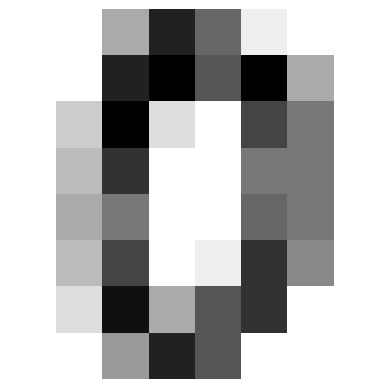

0


In [305]:
def plot_digit(image_data):
    image = image_data.reshape(8, 8)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

num=0

digito = df_digits.loc[:, df_digits.columns != 'numero'].iloc[num]
plot_digit(np.array(digito))
plt.show()
print(int(df_digits.loc[:,'numero'].iloc[num]))

#### DIVIDIR LOS DATOS

In [306]:
df_digits_train, df_digits_test = train_test_split(df_digits, test_size=0.15, random_state=17)

df_digits_train_y = df_digits_train['numero'].copy()
df_digits_train_x = df_digits_train.drop('numero',axis=1)

df_digits_test_y = df_digits_test['numero'].copy()
df_digits_test_x = df_digits_test.drop('numero',axis=1)

#### PREPARAR LOS DATOS

In [307]:
preprocessing = ColumnTransformer([
    ("scaler", StandardScaler(), slice(0, df_digits_train_x.shape[1]))  # Aplica a todas las características
])

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Usa evaluación cruzada con los siguientes algoritmos, evalua los resultados en el conjunto de entrenamiento (exactitud) y calcula la matriz de confusión:
- Regresión logistica
- Maquinas de vectores de sorpote
- Random forest

LogisticRegression
exactitud: 0.9685658153241651


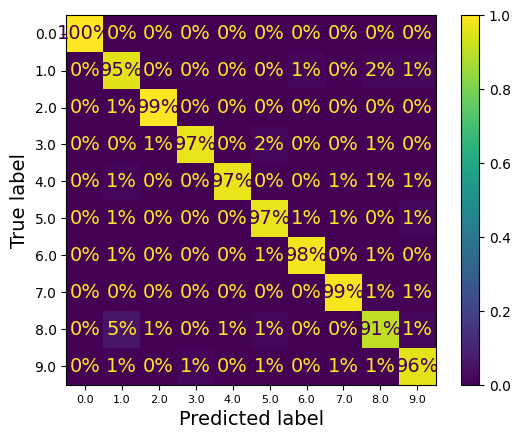

------------------
SVC
exactitud: 0.9836280288146693


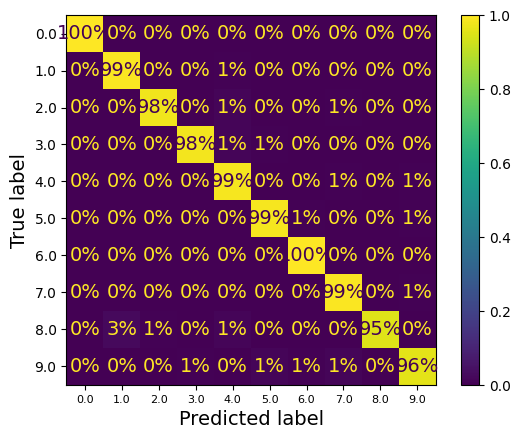

------------------
RandomForestClassifier
exactitud: 0.9692206941715783


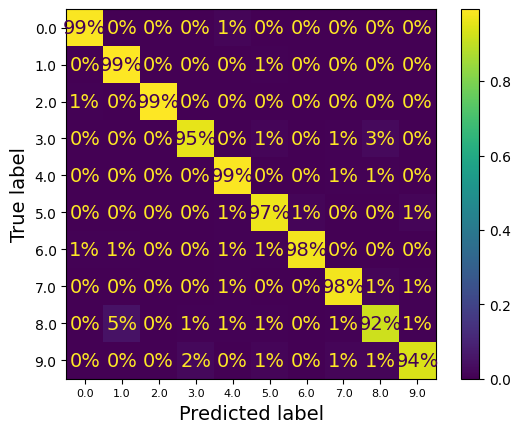

------------------


In [308]:
modelo_LR=make_pipeline(preprocessing,LogisticRegression(random_state=17, max_iter=1000))
modelo_SVC=make_pipeline(preprocessing,SVC(random_state=17, max_iter=1000))
modelo_RF=make_pipeline(preprocessing,RandomForestClassifier(random_state=17))

modelos=[modelo_LR,modelo_SVC,modelo_RF]

for modelo in modelos:
    
    modelo.fit(df_digits_train_x,df_digits_train_y)
    
    predicciones = cross_val_predict(modelo, df_digits_train_x, df_digits_train_y, cv=3)
    
    exactitud=accuracy_score(df_digits_train_y,predicciones)
    
    

    print(modelo.steps[-1][1].__class__.__name__)
    print("exactitud:",exactitud)
    
    ConfusionMatrixDisplay.from_predictions(
        df_digits_train_y, predicciones, normalize="true", values_format=".0%"
    )
    plt.show()
    print("------------------")


In [167]:
"""
RF vuelve a ser perfecto, asi que una vez más vamos con LR
"""

'\nRF vuelve a ser perfecto, asi que una vez más vamos con LR\n'

### OPMITZACIÓN DEL MODELO

#### OPTIMIZACIÓN

Usa búsqueda exhaustiva o búsqueda aleatoria para optimizar el mejor modelo del apartado anterior

In [168]:
full_pieline=Pipeline([
    ('preprocessing',preprocessing),
    ('classifier',LogisticRegression())
])
param_dist = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],            # Inverso de la fuerza de regularización
    'classifier__solver': ['lbfgs', 'saga', 'liblinear'],       # Algoritmos de optimización
    'classifier__max_iter': [5000],                             # Número máximo de iteraciones
    'classifier__random_state': [17]                            # Fijar la semilla para reproducibilidad
}

# Configurar la búsqueda aleatoria
grid_search = GridSearchCV(
    estimator=full_pieline,
    param_grid=param_dist,
    scoring="accuracy",  # Métrica de evaluación
    cv=5,  # Validación cruzada con 5 folds
    verbose=1,  # Mostrar progreso
    n_jobs=-1  # Usar todos los núcleos disponibles 
)

# Realizar la búsqueda en el conjunto de entrenamiento
grid_search.fit(df_digits_train_x, df_digits_train_y)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros GridSearch:", grid_search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores hiperparámetros GridSearch: {'classifier__C': 1, 'classifier__max_iter': 5000, 'classifier__random_state': 17, 'classifier__solver': 'lbfgs'}


#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

In [169]:
best_model = grid_search.best_estimator_

scoring = ['accuracy']
cv_results = cross_validate(best_model, df_digits_test_x, df_digits_test_y, cv=3, scoring=scoring, return_train_score=False)

print("Exactitud del conjunto de prueba:", np.mean(cv_results['test_accuracy']))


Exactitud del conjunto de prueba: 0.9481481481481482


### PRESENTACIÓN DE LA SOLUCIÓN

Simplemente guarda el modelo

In [170]:
joblib.dump(best_model, "./solucion2/modelo_numeros.pkl")

['./solucion2/modelo_numeros.pkl']

## EJERCICIO 3

Vamos a trabajar con un conjunto de datos donde cada instancia (en este caso, cada película) pueda tener múltiples etiquetas (géneros en este caso).

Tienes los datos en el fichero tmdb_5000_movies.csv

Crea un clasificador que te diga los generos que le corresponden a cada película.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [171]:
# Cargar los datos
data = pd.read_csv("Datos/tmdb_5000_movies.csv")

# Preprocesamiento de datos
# Transformar géneros en listas de palabras separadas
data["genres"] = data["genres"].apply(lambda x: [genre["name"] for genre in eval(x)])

# Dividir los datos en características (X) y etiquetas (y)
x = data["overview"]
y = data["genres"]

#### EXPLORAR LOS DATOS

In [172]:
print(y,"\n",x)


0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4803, dtype: object 
 0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mar

In [173]:
x.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4803 entries, 0 to 4802
Series name: overview
Non-Null Count  Dtype 
--------------  ----- 
4800 non-null   object
dtypes: object(1)
memory usage: 37.7+ KB


In [174]:
# Habrá que borrar los 3 valores nulos

In [175]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4803 entries, 0 to 4802
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
4803 non-null   object
dtypes: object(1)
memory usage: 37.7+ KB


In [176]:
print(x[0])

In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.


In [177]:
print(y[0])

['Action', 'Adventure', 'Fantasy', 'Science Fiction']


In [178]:
unique_genres = set(genre for genres_list in y for genre in genres_list)

# Mostrar el resultado
print("Géneros únicos:", unique_genres)
print(f"Cantidad de géneros únicos:{len(unique_genres)}")

Géneros únicos: {'TV Movie', 'Adventure', 'Family', 'Comedy', 'Animation', 'Fantasy', 'Thriller', 'Drama', 'Western', 'Horror', 'Mystery', 'Documentary', 'Science Fiction', 'War', 'Foreign', 'Crime', 'History', 'Romance', 'Music', 'Action'}
Cantidad de géneros únicos:20


#### DIVIDIR LOS DATOS

In [179]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=17)

#### PREPARAR LOS DATOS

Tienes aquí las transformaciones que hay que hacer a los datos pero busca en internet que estamos haciendo exactamente y explicalo (igual hay que hacer algo con los datos que faltan)

In [180]:
""" 
TfidfVectorizer() es un conversor de documentos de texto a matrices númericas basandose en el concepto TF-IDF
Se usa para poder entrenar a los modelos de procesamiento de lenguaje natural.

TF-IDF:
TF (Team Frecuency): Mide cuántas veces aparece una palabra en un documento en relación con la longitud del mismo.
IDF (Inverse Document Frequency): Mide cuán común o raro es un término en todos los documentos. Si una palabra aparece en muchos documentos, su peso será menor. 

TF-IDF(t,d)=TF(t,d).log(N/(1+DF(t)))
t: termino (o palabra)
d: documento
N: numero de documetos
DF(t): numero de documentos que contienen el termino t

MultiLabelBinarizer(): Transforma etiquetas multilabel (es decir, donde un solo ejemplo puede pertenecer a múltiples categorías o clases)
en un formato binario adecuado para algoritmos de aprendizaje automático.
"""

' \nTfidfVectorizer() es un conversor de documentos de texto a matrices númericas basandose en el concepto TF-IDF\nSe usa para poder entrenar a los modelos de procesamiento de lenguaje natural.\n\nTF-IDF:\nTF (Team Frecuency): Mide cuántas veces aparece una palabra en un documento en relación con la longitud del mismo.\nIDF (Inverse Document Frequency): Mide cuán común o raro es un término en todos los documentos. Si una palabra aparece en muchos documentos, su peso será menor. \n\nTF-IDF(t,d)=TF(t,d).log(N/(1+DF(t)))\nt: termino (o palabra)\nd: documento\nN: numero de documetos\nDF(t): numero de documentos que contienen el termino t\n\nMultiLabelBinarizer(): Transforma etiquetas multilabel (es decir, donde un solo ejemplo puede pertenecer a múltiples categorías o clases)\nen un formato binario adecuado para algoritmos de aprendizaje automático.\n'

In [181]:
# Eliminar filas con NaN en X_train y X_test
x_train = x_train.dropna()
x_test = x_test.dropna()
# Eliminar filas con NaN en y_train y y_test
y_train = y_train.loc[x_train.index]
y_test = y_test.loc[x_test.index]

tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

mlb = MultiLabelBinarizer()
y_train_transformed = mlb.fit_transform(y_train)
y_test_transformed = mlb.transform(y_test)


### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Crea un modelo Random Forest y evalúa el modelo en el conjunto de entrenamiento (accuracy), no hace falta usar validación cruzada.

In [182]:
# Crear el modelo
model= RandomForestClassifier()

# Entrenar el modelo con todo el conjunto de entrenamiento
model.fit(x_train_tfidf, y_train_transformed)

# Evaluar en el conjunto de prueba
y_predicciones_train = model.predict(x_train_tfidf)
precision_entrenamiento = accuracy_score(y_train_transformed, y_predicciones_train)
print("Exactitud en el conjunto de entrenamiento:", precision_entrenamiento)

Exactitud en el conjunto de entrenamiento: 0.9990193674920324


#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

Evalúa el modelo en el conjuno de prueba y muestra las primeras 25 predicciones y sus correspondientes valores reales (con texto, para lo cual tendras que aplicar mlb.inverse_transform a las predicciones).

¿Qué puedes deducir del resultado?

In [183]:
# Evaluar en el conjunto de prueba
y_predicciones_test = model.predict(x_test_tfidf)
precision_prueba = accuracy_score(y_test_transformed, y_predicciones_test)
print("Exactitud en el conjunto de prueba:",precision_prueba)

Exactitud en el conjunto de prueba: 0.06657420249653259


In [184]:
pred = mlb.inverse_transform(y_predicciones_test)
print(pred[:25])

[('Drama',), ('Drama',), ('Drama',), (), (), ('Action', 'Adventure', 'Science Fiction'), ('Drama',), (), ('Comedy', 'Drama'), (), (), (), ('Science Fiction',), (), (), (), ('Drama',), (), ('Drama',), ('Drama',), (), ('Drama',), (), ('Comedy',), ()]


In [ ]:
"""
El modelo no generaliza bien, puede deberse a un sobreajustamiento o a un subajustamiento, viendo que la mayoria de sus predicciones
son drama seguramente se deba a un debalanceo en los datos iniciales.  
"""